<center>

# Classificador Hough

</center>

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [101]:
# Definindo as imagens
torta_de_maca = cv2.imread("HOG/torta de maca/torta de maca.jpg", 0)
bife_carpaccio = cv2.imread("HOG/bife carpaccio/bife carpaccio.jpg", 0)
nhoque = cv2.imread("HOG/nhoque/nhoque.jpg", 0)
arroz_frito = cv2.imread("HOG/arroz frito/arroz frito.jpg", 0)
hora_de_morbar = cv2.imread("HOG/hora de morbar/morbinTime.jpeg", 0)
nero = cv2.imread("HOG/can we get much higher/nero.jpg", 0)

In [102]:
# Parâmetros HOUGH, como definido no artigo "Histograms of Oriented Gradients for Human Detection"
largura = 64
altura = 128

torta_de_maca = cv2.resize(torta_de_maca, (largura, altura))
bife_carpaccio = cv2.resize(bife_carpaccio, (largura, altura))
nhoque = cv2.resize(nhoque, (largura, altura))
arroz_frito = cv2.resize(arroz_frito, (largura, altura))
hora_de_morbar = cv2.resize(hora_de_morbar, (largura, altura))
nero = cv2.resize(nero, (largura, altura))

# Salvando as imagens


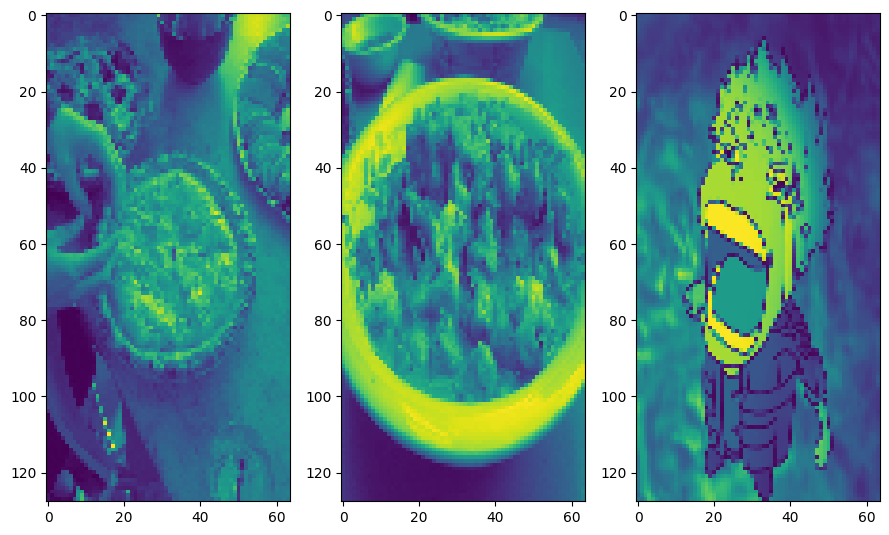

In [103]:
# Testando saída de imagens, lado a lado
fig, axs = plt.subplots(1, 3, figsize=(9, 9))

axs[0].imshow(torta_de_maca)
axs[1].imshow(nhoque)
axs[2].imshow(nero)

plt.tight_layout()
plt.show()

In [104]:
# Função para calcular o gradiente da imagem
def gradientes(imagem):
    grad_x = cv2.Sobel(imagem, cv2.CV_32F, 1, 0, ksize=1)
    grad_y = cv2.Sobel(imagem, cv2.CV_32F, 0, 1, ksize=1)

    magnitude = cv2.magnitude(grad_x, grad_y)
    direcao = cv2.phase(grad_x, grad_y, angleInDegrees=True)

    return magnitude, direcao

In [116]:
# Usando as imagens de exemplo
gradiente_em_x_torta_de_maca = gradientes(torta_de_maca)[0]
gradiente_em_y_torta_de_maca = gradientes(torta_de_maca)[1]
cv2.imwrite("HOG/torta de maca/gradiente_em_x_torta_de_maca.bmp", gradiente_em_x_torta_de_maca)
cv2.imwrite("HOG/torta de maca/gradiente_em_y_torta_de_maca.bmp", gradiente_em_y_torta_de_maca)

gradiente_em_x_bife_carpaccio = gradientes(bife_carpaccio)[0]
gradiente_em_y_bife_carpaccio = gradientes(bife_carpaccio)[1]
cv2.imwrite("HOG/bife carpaccio/gradiente_em_x_bife_carpaccio.bmp", gradiente_em_x_bife_carpaccio)
cv2.imwrite("HOG/bife carpaccio/gradiente_em_y_bife_carpaccio.bmp", gradiente_em_y_bife_carpaccio)

gradiente_em_x_nhoque = gradientes(nhoque)[0]
gradiente_em_y_nhoque = gradientes(nhoque)[1]
cv2.imwrite("HOG/nhoque/gradiente_em_x_nhoque.bmp", gradiente_em_x_nhoque)
cv2.imwrite("HOG/nhoque/gradiente_em_y_nhoque.bmp", gradiente_em_y_nhoque)

gradiente_em_x_arroz_frito = gradientes(arroz_frito)[0]
gradiente_em_y_arroz_frito = gradientes(arroz_frito)[1]
cv2.imwrite("HOG/arroz frito/gradiente_em_x_arroz_frito.bmp", gradiente_em_x_arroz_frito)
cv2.imwrite("HOG/arroz frito/gradiente_em_y_arroz_frito.bmp", gradiente_em_y_arroz_frito)

gradiente_em_x_hora_de_morbar = gradientes(hora_de_morbar)[0]
gradiente_em_y_hora_de_morbar = gradientes(hora_de_morbar)[1]
cv2.imwrite("HOG/hora de morbar/gradiente_em_x_hora_de_morbar.bmp", gradiente_em_x_hora_de_morbar)
cv2.imwrite("HOG/hora de morbar/gradiente_em_y_hora_de_morbar.bmp", gradiente_em_y_hora_de_morbar)

gradiente_em_x_nero = gradientes(nero)[0]
gradiente_em_y_nero = gradientes(nero)[1]
cv2.imwrite("HOG/can we get much higher/gradiente_em_x_nero.bmp", gradiente_em_x_nero)
cv2.imwrite("HOG/can we get much higher/gradiente_em_y_nero.bmp", gradiente_em_y_nero)

True

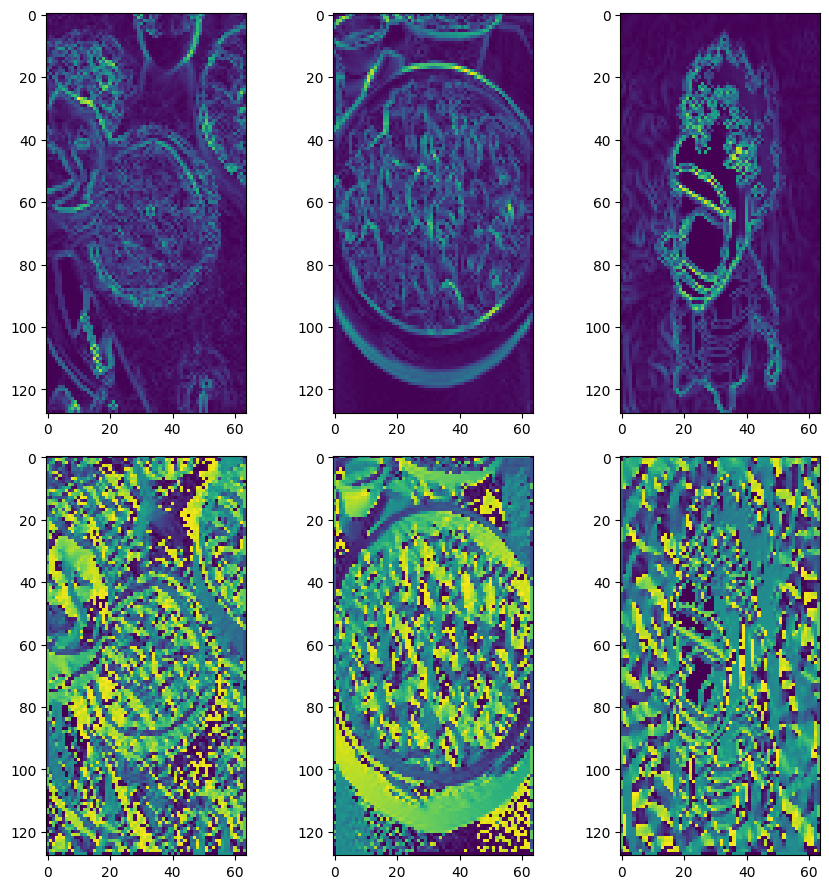

In [117]:
# Testando saída de imagens, lado a lado
fig, axs = plt.subplots(2, 3, figsize=(9, 9))

axs[0, 0].imshow(gradiente_em_x_torta_de_maca)
axs[0, 1].imshow(gradiente_em_x_nhoque)
axs[0, 2].imshow(gradiente_em_x_nero)

axs[1, 0].imshow(gradiente_em_y_torta_de_maca)
axs[1, 1].imshow(gradiente_em_y_nhoque)
axs[1, 2].imshow(gradiente_em_y_nero)

plt.tight_layout()
plt.show()